In [1]:
#Task 1
from sklearn.datasets import load_wine
import numpy as np
from sklearn.svm import SVC
wine = load_wine()

In [2]:
test_USPS = np.genfromtxt("zip.test", delimiter=" ")
train_USPS = np.genfromtxt("zip.train", delimiter=" ")
USPS = np.vstack((test_USPS,train_USPS))     
X_USPS = USPS[:,1:]
y_USPS = USPS[:,0]

In [3]:
print(np.shape(y_USPS))
print(y_USPS)

(9298,)
[9. 6. 3. ... 3. 0. 1.]


In [4]:
#Task 2 
#splitting wine dataset into training and test sets
from sklearn.model_selection import train_test_split
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(wine['data'],
wine['target'], random_state=301)

In [49]:
#splitting USPS dataset into training and test sets
X_USPS_train, X_USPS_test, y_USPS_train, y_USPS_test = train_test_split(X_USPS,
y_USPS, random_state=301)

In [6]:
#print(np.shape(X_USPS_train))
#print(np.shape(X_USPS_test))
#print(wine.target)

In [7]:
#Task 3
from sklearn.model_selection import cross_val_score
svm = SVC()
cvs_wine = cross_val_score(svm, X_wine_train, y_wine_train)
print("Generalisation Accuracy for Wine data training set:",np.mean(cvs_wine))
cvs_USPS = cross_val_score(svm, X_USPS_train, y_USPS_train)
print("Generalisation Accuracy for USPS data training set:",np.mean(cvs_USPS))
#print("Accuracy on training set:", svc.score(X_train, y_train)) 
#print(cvs)

Generalisation Accuracy for Wine data training set: 0.7145299145299144
Generalisation Accuracy for USPS data training set: 0.9710313015843631


In [8]:
#Task 4
svm_wine = svm.fit(X_wine_train, y_wine_train)
score_wine = svm.score(X_wine_test, y_wine_test)
print("Test Error rate for wine training dataset : ",(1-score_wine))
svm_USPS = svm.fit(X_USPS_train, y_USPS_train)
score_USPS = svm.score(X_USPS_test, y_USPS_test)
print("Test Error rate for USPS training dataset : ",(1-score_USPS))

Test Error rate for wine training dataset :  0.28888888888888886
Test Error rate for USPS training dataset :  0.026666666666666616


In [9]:
#Task 5
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#def pipelineSelection(normalizer):
   # pipe_long_wine_ss = Pipeline([("scaler", normalizer), ("svm", SVC())])
   # pipe_wine_ss = make_pipeline(normalizer, SVC()) 
   # pipe_wine_ss.steps
   # pipe_wine_ss.fit(X_train, y_train)
   # print("Wine Dataset")
   # print("Accuracy Score for Wine Dataset with Pipeline ",pipe_wine_ss.score(X_wine_test, y_wine_test))
   # from sklearn.model_selection import GridSearchCV 
   # param_grid_wine_ss = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
   # grid_wine_ss = GridSearchCV(pipe_wine_ss, param_grid=param_grid_wine_ss, cv=5) 
   # grid_wine_ss.fit(X_wine_train, y_wine_train)
   # print("Best cross-validation accuracy for Wine Dataset:", grid_wine_ss.best_score_) 
   # print("Test set score for Wine DataSet:", grid_wine_ss.score(X_wine_test, y_wine_test)) 
   # print("Best parameters for Wine Dataset:", grid_wine_ss.best_params_)
    

The Generalization acuuracy for Task 3 : 0.7145299145299144.
The Test error rate as obtained in Task 4 : 0.28888888888888886

In [10]:
#Task 5
#wine dataset
#Pipelining SVC and StandardScaler()
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe_long_wine_ss = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
pipe_wine_ss = make_pipeline(StandardScaler(), SVC()) 
pipe_wine_ss.steps
pipe_wine_ss.fit(X_wine_train, y_wine_train)
print("Wine Dataset - StandardScaler()")
print("Accuracy Score for Wine Dataset with Pipeline ",pipe_wine_ss.score(X_wine_test, y_wine_test))
from sklearn.model_selection import GridSearchCV 
param_grid_wine_ss = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_wine_ss = GridSearchCV(pipe_wine_ss, param_grid=param_grid_wine_ss, cv=5) 
grid_wine_ss.fit(X_wine_train, y_wine_train)
print("Best cross-validation accuracy for Wine Dataset:", grid_wine_ss.best_score_) 
print("Test set score for Wine DataSet:", grid_wine_ss.score(X_wine_test, y_wine_test)) 
print("Best parameters for Wine Dataset:", grid_wine_ss.best_params_)

Wine Dataset - StandardScaler()
Accuracy Score for Wine Dataset with Pipeline  0.9333333333333333
Best cross-validation accuracy for Wine Dataset: 0.9923076923076923
Test set score for Wine DataSet: 0.9333333333333333
Best parameters for Wine Dataset: {'svc__C': 1, 'svc__gamma': 0.01}


In [11]:
#wine dataset
#Pipelining SVC and MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
pipe_long_wine_ms = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe_wine_ms = make_pipeline(MinMaxScaler(), SVC()) 
pipe_wine_ms.steps
pipe_wine_ms.fit(X_wine_train, y_wine_train)
print("Wine Dataset - MinMaxScaler()")
print("Accuracy Score for Wine Dataset with Pipeline ",pipe_wine_ms.score(X_wine_test, y_wine_test))
from sklearn.model_selection import GridSearchCV 
param_grid_wine_ms = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_wine_ms = GridSearchCV(pipe_wine_ms, param_grid=param_grid_wine_ms, cv=5) 
grid_wine_ms.fit(X_wine_train, y_wine_train)
print("Best cross-validation accuracy for Wine Dataset:", grid_wine_ms.best_score_) 
print("Test set score for Wine DataSet:", grid_wine_ms.score(X_wine_test, y_wine_test)) 
print("Best parameters for Wine Dataset:", grid_wine_ms.best_params_)

Wine Dataset - MinMaxScaler()
Accuracy Score for Wine Dataset with Pipeline  0.9333333333333333
Best cross-validation accuracy for Wine Dataset: 0.9925925925925926
Test set score for Wine DataSet: 0.9333333333333333
Best parameters for Wine Dataset: {'svc__C': 1, 'svc__gamma': 1}


In [12]:
#wine dataset
#Pipelining SVC and RobustScaler()
from sklearn.preprocessing import RobustScaler
pipe_long_wine_rs = Pipeline([("scaler", RobustScaler()), ("svm", SVC())])
pipe_wine_rs = make_pipeline(RobustScaler(), SVC()) 
pipe_wine_rs.steps
pipe_wine_rs.fit(X_wine_train, y_wine_train)
print("Wine Dataset - RobustScaler()")
print("Accuracy Score for Wine Dataset with Pipeline ",pipe_wine_rs.score(X_wine_test, y_wine_test))
from sklearn.model_selection import GridSearchCV 
param_grid_wine_rs = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_wine_rs = GridSearchCV(pipe_wine_rs, param_grid=param_grid_wine_rs, cv=5) 
grid_wine_rs.fit(X_wine_train, y_wine_train)
print("Best cross-validation accuracy for Wine Dataset:", grid_wine_rs.best_score_) 
print("Test set score for Wine DataSet:", grid_wine_rs.score(X_wine_test, y_wine_test)) 
print("Best parameters for Wine Dataset:", grid_wine_rs.best_params_)

Wine Dataset - RobustScaler()
Accuracy Score for Wine Dataset with Pipeline  0.9555555555555556
Best cross-validation accuracy for Wine Dataset: 0.9925925925925926
Test set score for Wine DataSet: 0.9555555555555556
Best parameters for Wine Dataset: {'svc__C': 1, 'svc__gamma': 0.01}


In [13]:
#wine dataset
#Pipelining SVC and Normalizer()
from sklearn.preprocessing import Normalizer
pipe_long_wine_n = Pipeline([("scaler", Normalizer()), ("svm", SVC())])
pipe_wine_n = make_pipeline(Normalizer(), SVC()) 
pipe_wine_n.steps
pipe_wine_n.fit(X_wine_train, y_wine_train)
print("Wine Dataset - Normalizer()")
print("Accuracy Score for Wine Dataset with Pipeline ",pipe_wine_n.score(X_wine_test, y_wine_test))
from sklearn.model_selection import GridSearchCV 
param_grid_wine_n = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_wine_n = GridSearchCV(pipe_wine_n, param_grid=param_grid_wine_n, cv=5) 
grid_wine_n.fit(X_wine_train, y_wine_train)
print("Best cross-validation accuracy for Wine Dataset:", grid_wine_n.best_score_) 
print("Test set score for Wine DataSet:", grid_wine_n.score(X_wine_test, y_wine_test)) 
print("Best parameters for Wine Dataset:", grid_wine_n.best_params_)

Wine Dataset - Normalizer()
Accuracy Score for Wine Dataset with Pipeline  0.4222222222222222
Best cross-validation accuracy for Wine Dataset: 0.9401709401709402
Test set score for Wine DataSet: 0.8888888888888888
Best parameters for Wine Dataset: {'svc__C': 100, 'svc__gamma': 100}


In [18]:
#Task 5
#USPS dataset
#Pipelining SVC and StandardScaler()
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe_long_USPS_ss = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
pipe_USPS_ss = make_pipeline(StandardScaler(), SVC()) 
pipe_USPS_ss.steps
pipe_USPS_ss.fit(X_USPS_train, y_USPS_train)
print("USPS Dataset - StandardScaler()")
print("Accuracy Score for USPS Dataset with Pipeline ",pipe_USPS_ss.score(X_USPS_test, y_USPS_test))
from sklearn.model_selection import GridSearchCV 
param_grid_USPS_ss = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_USPS_ss = GridSearchCV(pipe_USPS_ss, param_grid=param_grid_USPS_ss, cv=5,n_jobs = -1) 
grid_USPS_ss.fit(X_USPS_train, y_USPS_train)
print("Best cross-validation accuracy for USPS Dataset:", grid_USPS_ss.best_score_) 
print("Test set score for USPS DataSet:", grid_USPS_ss.score(X_USPS_test, y_USPS_test)) 
print("Best parameters for USPS Dataset:", grid_USPS_ss.best_params_)

USPS Dataset - StandardScaler()
Accuracy Score for USPS Dataset with Pipeline  0.9681720430107527
Best cross-validation accuracy for USPS Dataset: 0.9670159361935176
Test set score for USPS DataSet: 0.963010752688172
Best parameters for USPS Dataset: {'svc__C': 100, 'svc__gamma': 0.001}


In [27]:
#USPS dataset
#Pipelining SVC and MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
pipe_long_USPS_ms = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe_USPS_ms = make_pipeline(MinMaxScaler(), SVC()) 
pipe_USPS_ms.steps
pipe_USPS_ms.fit(X_USPS_train, y_USPS_train)
print("USPS Dataset - MinMaxScaler()")
print("Accuracy Score for USPS Dataset with Pipeline ",pipe_USPS_ms.score(X_USPS_test, y_USPS_test))
from sklearn.model_selection import GridSearchCV 
param_grid_USPS_ms = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_USPS_ms = GridSearchCV(pipe_USPS_ms, param_grid=param_grid_USPS_ms, cv=5, n_jobs = -1) 
grid_USPS_ms.fit(X_USPS_train, y_USPS_train)
print("Best cross-validation accuracy for USPS Dataset:", grid_USPS_ms.best_score_) 
print("Test set score for USPS DataSet:", grid_USPS_ms.score(X_USPS_test, y_USPS_test)) 
print("Best parameters for USPS Dataset:", grid_USPS_ms.best_params_)

USPS Dataset
Accuracy Score for USPS Dataset with Pipeline  0.9733333333333334
Best cross-validation accuracy for USPS Dataset: 0.9718915166381266
Test set score for USPS DataSet: 0.970752688172043
Best parameters for USPS Dataset: {'svc__C': 10, 'svc__gamma': 0.01}


In [28]:
#USPS dataset
#Pipelining SVC and RobustScaler()
from sklearn.preprocessing import RobustScaler
pipe_long_USPS_rs = Pipeline([("scaler", RobustScaler()), ("svm", SVC())])
pipe_USPS_rs = make_pipeline(RobustScaler(), SVC()) 
pipe_USPS_rs.steps
pipe_USPS_rs.fit(X_USPS_train, y_USPS_train)
print("USPS Dataset - RobustScaler()")
print("Accuracy Score for USPS Dataset with Pipeline ",pipe_USPS_rs.score(X_USPS_test, y_USPS_test))
from sklearn.model_selection import GridSearchCV 
param_grid_USPS_rs = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_USPS_rs = GridSearchCV(pipe_USPS_rs, param_grid=param_grid_USPS_rs, cv=5, n_jobs = -1) 
grid_USPS_rs.fit(X_USPS_train, y_USPS_train)
print("Best cross-validation accuracy for USPS Dataset:", grid_USPS_rs.best_score_) 
print("Test set score for USPS DataSet:", grid_USPS_rs.score(X_USPS_test, y_USPS_test)) 
print("Best parameters for USPS Dataset:", grid_USPS_rs.best_params_)

USPS Dataset
Accuracy Score for USPS Dataset with Pipeline  0.5888172043010753
Best cross-validation accuracy for USPS Dataset: 0.8782567377855942
Test set score for USPS DataSet: 0.9066666666666666
Best parameters for USPS Dataset: {'svc__C': 100, 'svc__gamma': 0.001}


In [29]:
#USPS dataset
#Pipelining SVC and Normalizer()
from sklearn.preprocessing import Normalizer
pipe_long_USPS_n = Pipeline([("scaler", Normalizer()), ("svm", SVC())])
pipe_USPS_n = make_pipeline(Normalizer(), SVC()) 
pipe_USPS_n.steps
pipe_USPS_n.fit(X_USPS_train, y_USPS_train)
print("USPS Dataset - Normalizer()")
print("Accuracy Score for USPS Dataset with Pipeline ",pipe_USPS_n.score(X_USPS_test, y_USPS_test))
from sklearn.model_selection import GridSearchCV 
param_grid_USPS_n = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_USPS_n = GridSearchCV(pipe_USPS_n, param_grid=param_grid_USPS_n, cv=5, n_jobs = -1) 
grid_USPS_n.fit(X_USPS_train, y_USPS_train)
print("Best cross-validation accuracy for USPS Dataset:", grid_USPS_n.best_score_) 
print("Test set score for USPS DataSet:", grid_USPS_n.score(X_USPS_test, y_USPS_test)) 
print("Best parameters for USPS Dataset:", grid_USPS_n.best_params_)

USPS Dataset - Normalizer()
Accuracy Score for USPS Dataset with Pipeline  0.9733333333333334
Best cross-validation accuracy for USPS Dataset: 0.9754763631127773
Test set score for USPS DataSet: 0.9741935483870968
Best parameters for USPS Dataset: {'svc__C': 10, 'svc__gamma': 1}


In [ ]:
#Best way to do pipelining for wine dataset is by using RobustScaler
#Best way to do pipelining for USPS dataset is by using Normalizer

In [19]:
#Task 6
grid_wine_rs_best = grid_wine_rs.fit(X_wine_train, y_wine_train)
y_wine_predicted = grid_wine_rs_best.predict(X_wine_test)
#print("Predicted Label for Wine dataset \n",y_wine_predicted)
print("Test Error Rate for wine dataset for RobustScaler: ",np.mean(y_wine_predicted!=y_wine_test))

Test Error Rate for wine dataset for RobustScaler:  0.044444444444444446


In [31]:
grid_USPS_n_best = grid_USPS_n.fit(X_USPS_train, y_USPS_train)
y_USPS_predicted = grid_USPS_n_best.predict(X_USPS_test)
#print("Predicted Label for Wine dataset \n",y_USPS_predicted)
print("Test Error Rate for USPS dataset for RobustScaler: ",np.mean(y_USPS_predicted!=y_USPS_test))

Predicted Label for Wine dataset 
 [1. 2. 5. ... 5. 1. 8.]
Test Error Rate for USPS dataset for RobustScaler:  0.025806451612903226


In [32]:
#Task 7
from sklearn.model_selection import KFold 
kf = KFold(shuffle=True, random_state=301) 
#kf

In [33]:
kf.get_n_splits()

5

In [34]:
def crossConformalPredictor(X_train,X_test,y_train):
    """
    This function computes the p value - cross conformal prediction for each of the test sample data for all the labels
    """
    accuracy_rate = None
    folds_ranks = None
    for rest_index, fold_index in kf.split(X_train):
        #print(rest_index)
        X_rest, X_fold = X_train[rest_index], X_train[fold_index]
        y_rest, y_fold = y_train[rest_index], y_train[fold_index] 
        grid_wine_rs.best_estimator_.fit(X_rest,y_rest)
        #print(X_fold)
        #print(grid_wine_rs.score(X_fold,y_fold))
        #print(grid_wine_rs.best_estimator_)
        conformal_score_fold = grid_wine_rs.best_estimator_.decision_function(X_fold)
        conformal_score_one = grid_wine_rs.best_estimator_.decision_function(X_test)
        #print(conformal_score_fold)
        fold_rank = None
        for each_sample in conformal_score_one:
            rank = np.sum(conformal_score_fold<each_sample,0)+1
            if fold_rank is None:
                fold_rank = [rank-1]
            else:
                fold_rank = np.vstack((fold_rank,[rank-1]))
        if folds_ranks is None:
            folds_ranks = [fold_rank]
        else:
            folds_ranks = np.vstack((folds_ranks, [fold_rank]))
    #print(folds_ranks)
    sum_ranks = np.sum(folds_ranks,0)
    p_values = (sum_ranks+1)/len(y_train)
    return(p_values) 

In [37]:
#calculating p value for wine dataset
y_wine_p_values = crossConformalPredictor(X_wine_train,X_wine_test,y_wine_train)
#print(y_wine_p_values)
y_hat_wine = np.argmax(y_wine_p_values,axis=1)
#print(y_hat_wine)
#print(y_wine_test)
#print("P values for wine dataset: \n",y_wine_p_values)
print("\nAccuracy of the model for wine dataset: ",np.mean(y_hat_wine==y_wine_test))


Accuracy of the model for wine dataset:  0.8888888888888888


In [36]:
#calculating p value for USPS dataset
y_USPS_p_values = crossConformalPredictor(X_USPS_train,X_USPS_test,y_USPS_train)
#print(y_wine_p_values)
y_hat_USPS = np.argmax(y_USPS_p_values,axis=1)
#print(y_hat_USPS)
#print(y_USPS_test)
#print("P values for USPS dataset: \n",y_USPS_p_values)
print("\nAccuracy of the model for USPS dataset: ",np.mean(y_hat_USPS==y_USPS_test))


Accuracy of the model for wine dataset:  0.7767741935483871


In [38]:
#function to calculate average false p value for the given datset
def averageFalseP(y_test,y_p_values):
    #print(y_p_values)
    avg_false_p_value = 0
    total_sum_rowwise = 0
    num_rows, num_cols = y_p_values.shape
    for index_label,n in enumerate(y_test):                           #looping over each test data label
        for index_p_value,m in enumerate(y_p_values):                 #looping over each row of p value data array
            if index_label == index_p_value:                          #comparing indexed for y_
                sum = 0
                for index, o in enumerate(y_p_values[index_p_value]): #looping over each row value for p value array
                    if n != index:                                    #eliminating true label
                        sum = sum+o
                avg_rowwise = sum
                total_sum_rowwise = total_sum_rowwise + avg_rowwise   #getting total false p values sum
    avg_false_p_value = total_sum_rowwise/(y_p_values.size-num_rows)
    return(avg_false_p_value)                                         #returning average false p value 

In [40]:
#calculating average false p value for wine dataset
average_false_p_value_wine = averageFalseP(y_wine_test,y_wine_p_values)
print("Average false p value for wine dataset: ",average_false_p_vale_wine)

Average false p value for wine dataset:  0.3432748538011696


In [41]:
#calculating average false p value for USPS dataset
average_false_p_value_USPS = averageFalseP(y_USPS_test,y_USPS_p_values)
print("Average false p value for USPS dataset: ",average_false_p_value_USPS)

Average false p value for USPS dataset:  0.4571201053525969


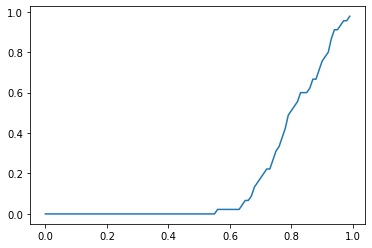

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
eps = np.zeros(100)  # a range of significance levels
err = np.zeros(100)  # the corresponding error rates
for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate 
    for j in range(len(y_wine_test)):
        if (y_wine_p_values[j,y_wine_test[j]] <= eps[k]): # if we made an error 
            err[k] = err[k] + 1 # count this error
    err[k] = err[k] / len(y_wine_test) # number of errors -> error rate 
plt.plot(eps,err)

In [56]:
print(y_USPS_p_values)
print(len(y_USPS_test))
%matplotlib inline
import matplotlib.pyplot as plt
eps = np.zeros(100)  # a range of significance levels
err = np.zeros(100)  # the corresponding error rates
for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate 
    for j in range(len(y_USPS_test)):
        if (y_USPS_p_values[j,y_USPS_test[j]] <= eps[k]): # if we made an error 
            err[k] = err[k] + 1 # count this error
    err[k] = err[k] / len(y_USPS_test) # number of errors -> error rate 
plt.plot(eps,err)

[[0.01175964 0.93689947 0.2004876  ... 0.7562025  0.62096659 0.87007027]
 [0.67015632 0.28610354 0.85917109 ... 0.5181414  0.25541374 0.27391367]
 [0.2994407  0.69267173 0.13953822 ... 0.10411588 0.84081457 0.39566901]
 ...
 [0.77929155 0.48573068 0.86203929 ... 0.59228453 0.38563029 0.42750609]
 [0.01936039 0.96256991 0.13638319 ... 0.22042163 0.92714757 0.74057077]
 [0.81500072 0.4972035  0.83522157 ... 0.6113581  0.40169224 0.44672307]]
2325


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices